---
## Anteil der Erde unter Wasser️

### 0. Python vorbereiten
Importiere die Libraries `numpy` und `pandas`.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### **1. Daten aus digitalem Höhenmodell einlesen** 


**Ein __[digitales Höhenmodell (DHM)](https://de.wikipedia.org/wiki/Digitales_H%C3%B6henmodell)__ beinhaltet Informationen zur Höhe der Erdoberfläche.** 

Es gibt u.a. auch sehr hochaufgelöste Höhenmodelle, zum Beispiel die öffentlich zugänglichen DHMs des Schweizer Bundesamts für Landestopografie [SwissTopo](https://www.swisstopo.admin.ch/de/geodata/height.html).

Heute geht es aber um ein __globales DHM__ mit einer relativ groben Auflösung von **25 Bogenminuten (~0.42°)**. Die Daten gehen zurück auf das Datenprodukt [ETOPO5](https://www.ngdc.noaa.gov/mgg/global/etopo5.HTML) der US-amerikanischen National Oceanographic and Atmospheric Administration [NOAA](https://www.noaa.gov/tools-and-resources).
:::

**Die Datei `ETOPO25.csv` enthält Daten zur Höhe der Erdoberfläche in einer Auflösung von 0.42° in Längen- und Breitengrad.**

Da Längengrade von 0° bis 360° und Breitengrade von -90° bis 90° gehen, sind es insgesamt etwa __370'000 Datenpunkte!__

Wir laden die Datei als `pandas` DataFrame namens `etopo`, und lassen die ersten 5 Zeilen mit der Methode `head()` ausgeben:

In [4]:
etopo = pd.read_csv('ETOPO25.csv')
etopo.head()

,Lon,Lat,Altitude
0,0.166705,-89.833256,2774.0
1,0.166705,-89.416396,2783.0
2,0.166705,-88.999537,2773.6
3,0.166705,-88.582677,2722.0
4,0.166705,-88.165818,2740.0


Der DataFrame `etopo` enthält also drei Spalten mit der __Longitude [°E]__, __Latitude [°N]__ und __Höhe [m]__ von jedem Punkt im DHM. 

Wir können die Daten mit einem etwas ungewöhnlichen Gebrauch von `scatter()` visualisieren:

/var/folders/5g/q633z24d7dx6gy2_3n2vv1h40000gn/T/ipykernel_58730/2612033623.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


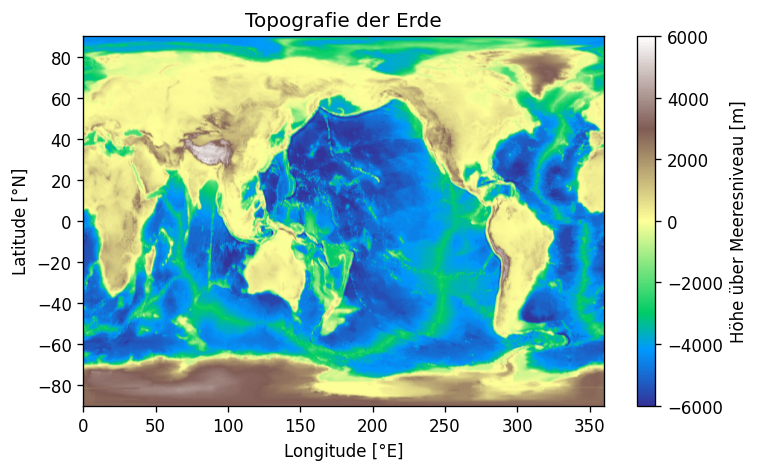

In [5]:
fig, ax = plt.subplots(dpi = 120, figsize=(7,4))

color_range = ax.scatter(etopo.Lon, etopo.Lat, s=0.05, c=etopo.Altitude, cmap='terrain', vmin=-6000, vmax=6000)
ax.set(xlim=[0, 360], ylim=[-90, 90], xlabel='Longitude [°E]', ylabel='Latitude [°N]', title='Topografie der Erde')
fig.colorbar(color_range, label='Höhe über Meeresniveau [m]')

fig.show()

#### **2. Höhenverteilung analysieren**

Deine Aufgabe: Anteil der Erdoberfläche über Meer berechnen

Man hört ja immer, ~70% der Erdoberfläche sei durch Ozean bedeckt. 

**Hast du das je nachgerechnet?**

Machen wir's jetzt.


Wir machen die vereinfachende Annahme, dass jeder Punkt im DHM die gleiche Fläche beschreibt (wegen der Kugelform der Erde stimmt das natürlich nicht ganz &mdash; 0.42° $\times$ 0.42° ist bei 80°N weitaus weniger als am Äquator.)

__Das heisst: der Anteil der Reihen in `etopo`, in denen die Höhe grösser 0 ist, gibt uns direkt den Anteil der Erdoberfläche über Meer!__

<font color=#208de2>__Definiere also eine logische Variable `index`,__</font> die überprüft, ob die Werte in der Spalte `Altitude` von `etopo` grösser als null sind.

Tipp
Wenn du `index` richtig definiert hast, wird es genauso viele Reihen wir `etopo` enthalten, also 373'248. Überprüfe dein Resultat, indem du die `size` von `index` ausgeben.


In [6]:
# Wenn Altitude > 0 set true
index = etopo.Altitude > 0
print(index)

0          True
1          True
2          True
3          True
4          True
          ...  
373243    False
373244    False
373245    False
373246    False
373247    False
Name: Altitude, Length: 373248, dtype: bool


Die Variable `index` besteht also aus **373'248 Boole'schen Elementen mit dem Wert `True` oder `False`.** Wenn wir die Anzahl `True`-Werte aufsummieren, wissen wir für wie viele Reihen die Altitude grösser als 0 ist.

<font color=#208de2>__Summiere die Variable `index` auf.__</font> Dabei wird `True` als `1`, `False` als `0` angesehen &mdash; die Summe ergibt also die **Anzahl Reihen mit `True`**!

In [7]:
# Meeresfläche init
sum_meeresfläche = 0

# Aufaddieren, wenn i true ist
for i in index:
    if i:
        sum_meeresfläche = sum_meeresfläche + 1

Jetzt müssen wir diese Anzahl nur noch <font color=#208de2>__durch die **totale Anzahl Reihen in `etopo`** dividieren__</font>, und wir haben den **Anteil** der Erdoberfläche über Meer.

Tipp
Gib die totale Anzahl nicht als festcodierte Zahl ein, sondern als Eigenschaft der Daten &mdash; z.B. als Länge der Spalte `Altitude`. Somit funktioniert der Code auch für einen anderen Datensatz mit höherer oder tieferer Auflösung.

In [8]:
print('Flächenanteil der Erde, welche mit Ozean bedeckt ist (%): ', 1 - (sum_meeresfläche / etopo.shape[0]))

Flächenanteil der Erde, welche mit Ozean bedeckt ist (%):  0.6659352494855967


Es stimmt also, dass ~70% der Erde vom Ozean bedeckt ist &mdash; oder?